Scientific course work 3rd year

$Background / Introduction$

The Standard & Poor’s 500, often abbreviated as the S&P500, is an American stock market index based on the market capitalizations of 500 large companies having common stock listed on the NYSE or NASDAQ. 

The S&P 500 index components and their weightings are determined by S&P Dow Jones Indices. It is one of the most commonly followed equity indices, and one of the best representations of the U.S. stock market, and a bellwether for the U.S. economy.

Why are logarithmic returns important in finance?

Logarithmic returns are important in finance because they provide a more accurate measure of the percentage change in the value of an asset over a period of time. This is particularly important when analyzing financial data because the compounding effect of returns over time can have a significant impact on the value of an asset.

The simple return of your portfolio over any time period is the weighted sum of all the simple returns from each of the security.  However, we cannot use the same statement with log returns.  It will give you an erroneous number.  Log return is a continuously compounded rate over time. When we add log returns, we compound. Across different stocks within the same time period, there is no compounding element here.

By using logarithmic returns, we can get a more accurate measure of the percentage change in the value of an asset over a period of time, which is crucial when working with financial data.

What distribution do stock returns follow?
We all know that stock market returns are not normally distributed. Instead, we think of them as having heavy tails (i.e. extreme events happen more frequently than expected).

In [12]:
!pip3 install datetime
!pip3 install yfinance
!pip3 install bs4
!pip3 install os
!pip3 install datetime
!pip3 install pandas
!pip3 install pandas_datareader
!pip3 install statsmodels
!pip3 install scipy
!pip3 install scikit-learn

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data
import plotly.express as px
import datetime as dt
import seaborn as sns

In [14]:
sp500 = yf.download('^GSPC', start='1981-05-01', end =dt.datetime.now())
sp500

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close   
Date                                                                          
1981-05-01     0.000000   134.169998   131.429993   132.720001   132.720001  \
1981-05-04     0.000000   131.779999   129.610001   130.669998   130.669998   
1981-05-05     0.000000   131.330002   128.929993   130.320007   130.320007   
1981-05-06     0.000000   132.380005   130.089996   130.779999   130.779999   
1981-05-07     0.000000   132.410004   130.210007   131.669998   131.669998   
...                 ...          ...          ...          ...          ...   
2024-06-05  5314.479980  5354.160156  5297.640137  5354.029785  5354.029785   
2024-06-06  5357.799805  5362.350098  5335.359863  5352.959961  5352.959961   
2024-06-07  5343.810059  5375.080078  5331.330078  5346.990234  5346.990234   
2024-06-10  5341.220215  5365.790039  5331.520020  5360.790039  5360.790039   
2024-06-12  5409.129883  5447.250000  5409.129883  5421.029785  5421.029785   

                Volume  
Date                    
1981-05-01    48360000  
1981-05-04    40430000  
1981-05-05    49000000  
1981-05-06    47100000  
1981-05-07    42590000  
...                ...  
2024-06-05  3591460000  
2024-06-06  3609990000  
2024-06-07  3692760000  
2024-06-10  3622280000  
2024-06-12  2704467000  

[10869 rows x 6 columns]

Now, let’s extract the historical prices of S&P 500 from yahoo finance using a python library yfinance from 01-05-1981 to the present days/nowadays.

In [15]:
sp500_aapl = yf.download('AAPL', start='1981-05-01', end =dt.datetime.now())
sp500_aapl.head()

[*********************100%%**********************]  1 of 1 completed


Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1981-05-01  0.126674  0.127790  0.126674  0.126674   0.097766  16553600
1981-05-04  0.126674  0.126674  0.126116  0.126116   0.097335  14448000
1981-05-05  0.126116  0.126116  0.125558  0.125558   0.096904  17539200
1981-05-06  0.122768  0.122768  0.122210  0.122210   0.094320  18950400
1981-05-07  0.123884  0.124442  0.123884  0.123884   0.095612   9363200

In [16]:
sp500_aapl.tail()

Open        High         Low       Close   Adj Close   
Date                                                                     
2024-06-05  195.399994  196.899994  194.869995  195.869995  195.869995  \
2024-06-06  195.690002  196.500000  194.169998  194.479996  194.479996   
2024-06-07  194.649994  196.940002  194.139999  196.889999  196.889999   
2024-06-10  196.899994  197.300003  192.149994  193.119995  193.119995   
2024-06-12  207.360001  220.199997  206.910004  213.070007  213.070007   

               Volume  
Date                   
2024-06-05   54156800  
2024-06-06   41181800  
2024-06-07   53103900  
2024-06-10   97262100  
2024-06-12  194031540

In [17]:
# sp500['Volume'].plot(grid=True,figsize=(10,5))
# plt.title('AAPL Volume')
# plt.xlabel('Date')
# plt.ylabel('Volume')
# plt.show()

sp500['Date'] = sp500.index

fig = px.area(
    sp500,
    x='Date',
    y='Volume',
    template='plotly_dark',
    color_discrete_sequence=['cyan'],
    title='S&P index'
)

fig.show()

[//]: # "The logarithmic return is a way of calculating the rate of return on an investment. To calculate it you need the initial value of the investment $V_i$, the final value $V_f$ and the number of time periods t. You then take the natural logarithm of $V_f$ divided by $V_i$, and divide the result by t: $$R = \frac{\ln(\frac{V_f}{V_i})}{t} \cdot 100\%$$ This value is normally expressed as a percentage, so you also multiply by 100."

[//]: # "The calculated rate will depend on the value of t
 that you use. If t
 is the number of years, then you get an annual rate. This then gives you the continuously compounded annual interest rate that you would need to receive in order to match the return on this investment."

 Let $p_t$ denote the price of an asset at time t. Then the return (simple return) of an asset captures these relative movements and is defined as $$r_t = \frac{p_t - p_{t - 1}}{p_{t - 1}} = \frac{p_t}{p_{t-1}} - 1$$ In words, a return is the change in price of an asset, relative to its previous value. Note that $p_t > 0$, and therefore $r_t > −1$.

In practice, “returns” often means “log returns”. Log returns are defined as $$z_t = \log(1 + r_t) = \log(\frac{p_t}{p_{t-1}}) = \log(p_t) - \log(p_{t - 1})$$

$\newline$

In [18]:
sp500['Log Return'] = np.log(sp500['Adj Close']/sp500['Adj Close'].shift(1))

print(sp500['Log Return'])

Date
1981-05-01         NaN
1981-05-04   -0.015567
1981-05-05   -0.002682
1981-05-06    0.003523
1981-05-07    0.006782
                ...   
2024-06-05    0.011778
2024-06-06   -0.000200
2024-06-07   -0.001116
2024-06-10    0.002578
2024-06-12    0.011174
Name: Log Return, Length: 10869, dtype: float64


Histogram of log-returns

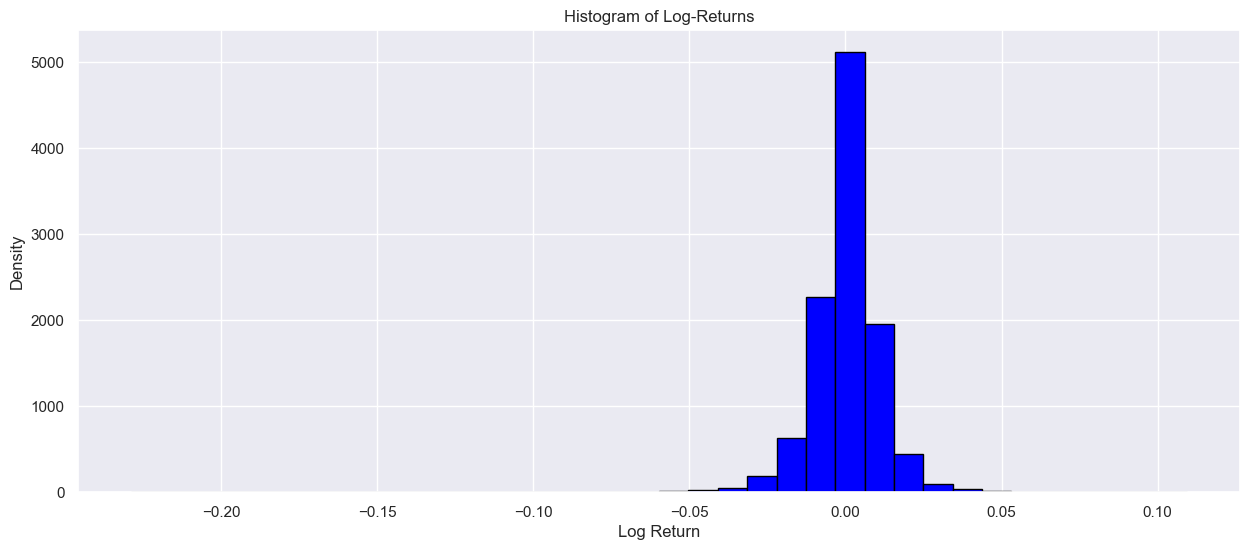

In [19]:
import seaborn as sns

plt.hist(sp500['Log Return'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

plt.title('Histogram of Log-Returns')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.show()

In [20]:
fig = px.histogram(
    sp500,
    x='Log Return',
    color_discrete_sequence=['cyan'],
    title='Histogram of Log-Returns',
    labels={'Log Return': 'Log Return', 'Density': 'Density'},
    template='plotly_dark'
)

fig.show()

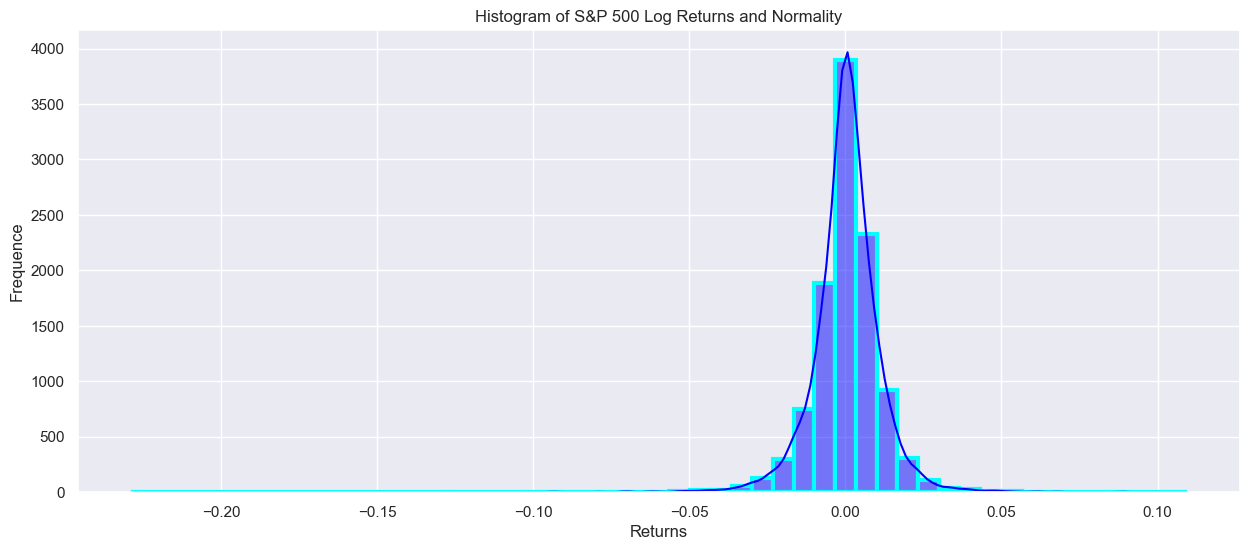

In [21]:
sns.histplot(sp500['Log Return'], bins=int(180/3.5), color='blue',
             edgecolor='cyan', kde=True, linewidth=3)

plt.title('Histogram of S&P 500 Log Returns and Normality')
plt.xlabel('Returns')
plt.ylabel('Frequence')

sns.set_theme(rc={'figure.figsize':(15,6)})

plt.show()

[//]: # "In the plot above we see that the tails of the distribution of the S&P 500 log-returns are fatter than the tails of a fitted normal distribution. (so if we increase the amount of bins, we'll see that the histogram of log-returns will be above the plot of the normal distribution)"

[//]: # "This means that large moves (both up and down) happens more often than suggested by
the model."

The empirical disribution is also commonly peaked around the center, i.e S&P500 historical returns shows non-normal features.

[//]: # "Calculating Daily Average Returns"

[//]: # "Daily Average Returns are given by computing the mean of the log rate of return series."

In [22]:
# daily_log_returns = sp500['Log Return'].mean()
# daily_log_returns

[//]: # "Calculating Annual Average Returns"

[//]: # "Annual Average Returns are given by computing the mean of the log rate of return series and then multiplying the value by 250 since 250 days exist in a business/trading day system. (because in one calendar year we have 250 workings days in a years; some people say that there are 252 tradings days, but we will consider 250 days, because it will convinient for us)"

In [23]:
# annual_log_returns = sp500['Log Return'].mean() * 250
# print(str(round(annual_log_returns*100, 2)) + ' %')

In [24]:
# sp500['42d'] = np.round(sp500['Close'].rolling(window=42).mean(),2)
# sp500['252d'] = np.round(sp500['Close'].rolling(window=252).mean(),2)

In [25]:
## sp500[['Close','42d','252d']].plot(grid=True,figsize=(8,5))
## plt.show()

# sp500['Date'] = sp500.index

# fig = px.line(
#     sp500,
#     x='Date',
#     y=['Close', '42d', '252d'],
#     template='plotly_dark',
#     color_discrete_sequence=['cyan', 'orange', 'green'],
#     title='Close Price with Moving Averages'
# )

# fig.show()

In [26]:
# sp500['Market Returns'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
# sp500['Market Returns'].plot(grid=True,figsize=(8,5))
# plt.show()

sp500['Market Returns'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

fig = px.line(x=sp500.index, y=sp500['Market Returns'], template='plotly_dark', color_discrete_sequence=['cyan'], title='Market Returns Over Time')

fig.show()

In [27]:
sp500.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date',
       'Log Return', 'Market Returns'],
      dtype='object')

In [28]:
sp500['Date'] = sp500.index

fig = px.line(
    sp500,
    x='Date',
    y='Close',
    template='plotly_dark',
    color_discrete_sequence=['cyan', 'orange', 'green'],
    title='Close Price with Moving Averages'
)

fig.show()

[//]: # "The first obvious thing to note, aside from the two giant dips at the tail end corresponding to the market crashes in 2020 and 2023, is that the data is clearly non-stationary.(below in this code we'll show it by using some tests)"

Below we will try to calculate the first difference of the series, i.e we will subtract the previous value t-1 from the current value t to get the difference.

In [29]:
sp500['First Difference'] = sp500['Close'] - sp500['Close'].shift()
# sp500['First Difference'].plot(figsize=(10, 5))
# plt.show()

fig = px.area(
    sp500,
    x='Date',
    y='First Difference',
    template='plotly_dark',
    color_discrete_sequence=['cyan'],
    title='First Difference'
)

fig.show()

[//]: # "The data no longer appears to be trending up over time and is instead centered around 0, but we have another problem."

If we pay attention to the variance, we will see that it's very small early on and steadily increases over time.

This is a sign that the data is not only non-stationary but also exponentially increasing. Now we'll apply a log transform to the original series.

In [30]:
sp500['Natural Log'] = sp500['Close'].apply(lambda x: np.log(x))
# sp500['Natural Log'].plot(figsize=(10, 5))
# plt.show()

fig = px.area(
    sp500,
    x='Date',
    y='Natural Log',
    template='plotly_dark',
    color_discrete_sequence=['cyan'],
    title='Natural Log'
)

fig.show()

In [31]:
sp500['Original Variance'] = sp500['Close'].rolling(window=30, center=True).var()
sp500['Log Variance'] = sp500['Natural Log'].rolling(window=30, center=True).var()

# fig, ax = plt.subplots(2, 1, figsize=(13, 12))
# sp500['Original Variance'].plot(ax=ax[0], title='Original Variance')
# sp500['Log Variance'].plot(ax=ax[1], title='Log Variance')
# fig.tight_layout()

fig = px.area(
    sp500,
    x='Date',
    y='Original Variance',
    template='plotly_dark',
    color_discrete_sequence=['cyan'],
    title='Original Variance'
)

fig.show()

fig = px.area(
    sp500,
    x='Date',
    y='Log Variance',
    template='plotly_dark',
    color_discrete_sequence=['cyan'],
    title='Log Variance'
)

fig.show()

Observe that in the top graph, we can't even see any of the variations until the late 80s. 

In the bottom graph however it's a different story, changes in the value are clearly visible throughout the entire data set. 

From this view, it's clear that our transformation has made the variance relatively constant.

In [73]:
sp500['Original Squared'] = sp500['Close'] ** 2
sp500['Log Squared'] = sp500['Natural Log'] ** 2

sp500['Original Mean Squared'] = sp500['Original Squared'].rolling(window=30, center=True).mean()
sp500['Log Mean Squared'] = sp500['Log Squared'].rolling(window=30, center=True).mean()

fig = px.area(
    sp500,
    x='Date',
    y='Original Mean Squared',
    template='plotly_dark',
    color_discrete_sequence=['cyan'],
    title='Original Mean Squared'
)
fig.show()

fig = px.area(
    sp500,
    x='Date',
    y='Log Mean Squared',
    template='plotly_dark',
    color_discrete_sequence=['cyan'],
    title='Log Mean Squared'
)
fig.show()


Now we'll calculate the first difference from the logged series, i.e we'll calculate log-returns

In [32]:
# Logged First Difference is the column of calculated log-returns
sp500['Logged First Difference'] = sp500['Natural Log'] - sp500['Natural Log'].shift()
sp500['Logged First Difference']

Date
1981-05-01         NaN
1981-05-04   -0.015567
1981-05-05   -0.002682
1981-05-06    0.003523
1981-05-07    0.006782
                ...   
2024-06-05    0.011778
2024-06-06   -0.000200
2024-06-07   -0.001116
2024-06-10    0.002578
2024-06-12    0.011174
Name: Logged First Difference, Length: 10869, dtype: float64

Note: The first value in the table is equal to $nan$, because $p_t−p_{t−1}=nan$ and the simple efficiency $r_t=\frac{p_t}{p_{t−1}} - 1 = nan$.

We'll use back fill method to replace NaN values, i.e the value of log-returns in first date 1981-05-01

In [33]:
# Using back fill method to replace NaN values
sp500['Logged First Difference'] = sp500['Logged First Difference'].fillna(method = 'bfill')
sp500_df = pd.DataFrame(sp500)
sp500_df

Open         High          Low        Close    Adj Close   
Date                                                                          
1981-05-01     0.000000   134.169998   131.429993   132.720001   132.720001  \
1981-05-04     0.000000   131.779999   129.610001   130.669998   130.669998   
1981-05-05     0.000000   131.330002   128.929993   130.320007   130.320007   
1981-05-06     0.000000   132.380005   130.089996   130.779999   130.779999   
1981-05-07     0.000000   132.410004   130.210007   131.669998   131.669998   
...                 ...          ...          ...          ...          ...   
2024-06-05  5314.479980  5354.160156  5297.640137  5354.029785  5354.029785   
2024-06-06  5357.799805  5362.350098  5335.359863  5352.959961  5352.959961   
2024-06-07  5343.810059  5375.080078  5331.330078  5346.990234  5346.990234   
2024-06-10  5341.220215  5365.790039  5331.520020  5360.790039  5360.790039   
2024-06-12  5409.129883  5447.250000  5409.129883  5421.029785  5421.029785   

                Volume       Date  Log Return  Market Returns   
Date                                                            
1981-05-01    48360000 1981-05-01         NaN             NaN  \
1981-05-04    40430000 1981-05-04   -0.015567       -0.015567   
1981-05-05    49000000 1981-05-05   -0.002682       -0.002682   
1981-05-06    47100000 1981-05-06    0.003523        0.003523   
1981-05-07    42590000 1981-05-07    0.006782        0.006782   
...                ...        ...         ...             ...   
2024-06-05  3591460000 2024-06-05    0.011778        0.011778   
2024-06-06  3609990000 2024-06-06   -0.000200       -0.000200   
2024-06-07  3692760000 2024-06-07   -0.001116       -0.001116   
2024-06-10  3622280000 2024-06-10    0.002578        0.002578   
2024-06-12  2704467000 2024-06-12    0.011174        0.011174   

            First Difference  Natural Log  Original Variance  Log Variance   
Date                                                                         
1981-05-01               NaN     4.888242                NaN           NaN  \
1981-05-04         -2.050003     4.872675                NaN           NaN   
1981-05-05         -0.349991     4.869993                NaN           NaN   
1981-05-06          0.459991     4.873517                NaN           NaN   
1981-05-07          0.889999     4.880299                NaN           NaN   
...                      ...          ...                ...           ...   
2024-06-05         62.689941     8.585605                NaN           NaN   
2024-06-06         -1.069824     8.585405                NaN           NaN   
2024-06-07         -5.969727     8.584289                NaN           NaN   
2024-06-10         13.799805     8.586867                NaN           NaN   
2024-06-12         60.239746     8.598041                NaN           NaN   

            Logged First Difference  
Date                                 
1981-05-01                -0.015567  
1981-05-04                -0.015567  
1981-05-05                -0.002682  
1981-05-06                 0.003523  
1981-05-07                 0.006782  
...                             ...  
2024-06-05                 0.011778  
2024-06-06                -0.000200  
2024-06-07                -0.001116  
2024-06-10                 0.002578  
2024-06-12                 0.011174  

[10869 rows x 14 columns]

In [34]:
# sp500['Logged First Difference'].plot(figsize=(10, 5))
# plt.show()

fig = px.line(sp500, x = 'Date', y = 'Logged First Difference', template='plotly_dark', color_discrete_sequence=['cyan'], title='S&P historical log-returns')

fig.show()

In [35]:
import scipy.stats as scs

# Obtaining range of the plot
plot_range = np.linspace(sp500['Logged First Difference'].min(), sp500['Logged First Difference'].max(), num=5000 )

# Obtaining the mean
mu = sp500['Logged First Difference'].mean()

# Obtaining the standard deviation
sigma = sp500['Logged First Difference'].std()

# Obtaining the probability distribution function of the log returns series
pdf_series = scs.norm.pdf(plot_range, loc=mu, scale=sigma)

print((mu, sigma))

(0.0003398870926926575, 0.011360308918479365)


Test for normality

C:\Users\HONOR\AppData\Local\Temp\ipykernel_15296\2901890456.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




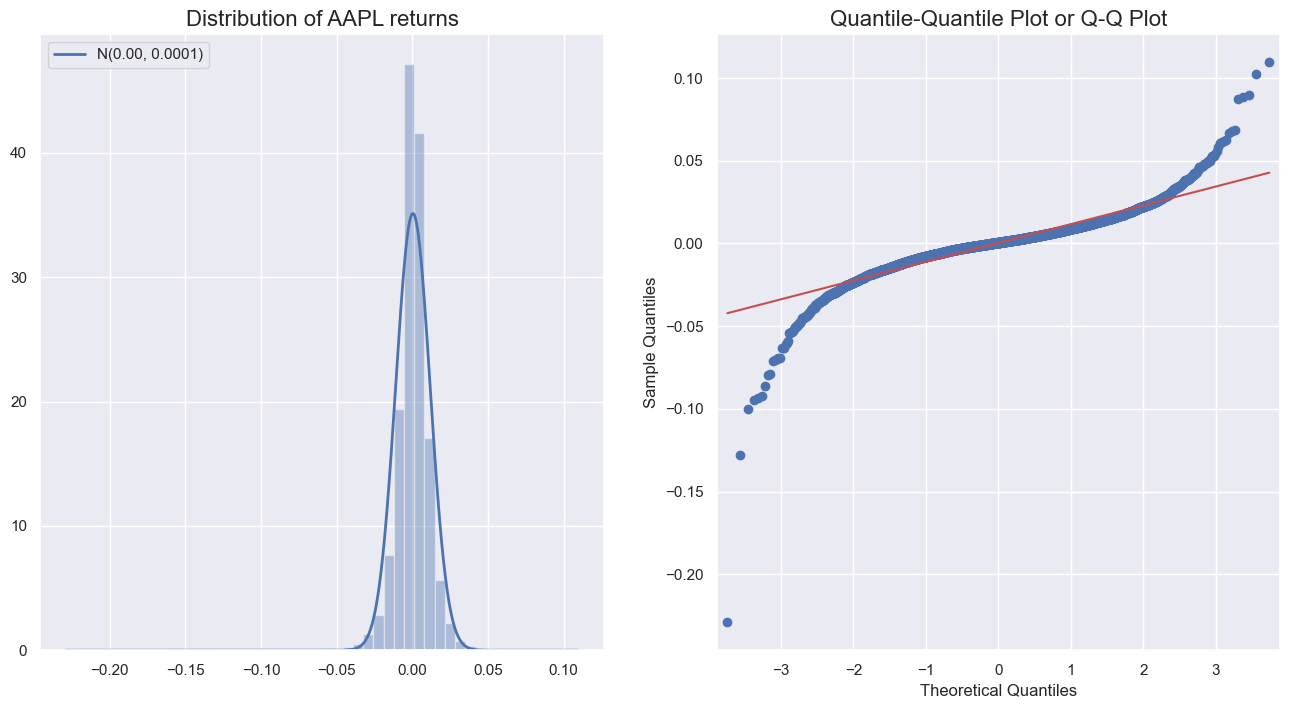

In [36]:
import statsmodels.api as sm
import scipy.stats as scs

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# kde : Whether to plot a gaussian kernel density estimate. Setting it to False to disable that
# norm_hist : produces density curve instead of count
sns.distplot(sp500['Logged First Difference'].values, kde=False, norm_hist=True, ax=ax[0])

ax[0].set_title('Distribution of AAPL returns', fontsize=16)
ax[0].plot(plot_range, pdf_series, 'b', lw=2, label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

qq = sm.qqplot(sp500['Logged First Difference'].values, line='s', ax=ax[1])
ax[1].set_title('Quantile-Quantile Plot or Q-Q Plot', fontsize = 16)
plt.show()

In [37]:
import plotly.graph_objs as go
import numpy as np
import scipy.stats as stats

# Quantile's Calculation
qq = stats.probplot(sp500['Logged First Difference'], dist="norm")
x = np.array([qq[0][0][0], qq[0][0][-1]])

# Q-Q plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=qq[0][0], y=qq[0][1], mode='markers', name='Empirical Data'))
fig.add_trace(go.Scatter(x=x, y=qq[1][1] + qq[1][0]*x, mode='lines', name='Theoretical Line'))
fig.update_layout(title='Q-Q Plot of Logged First Difference', xaxis_title='Theoretical Quantiles', yaxis_title='Sample Quantiles')
fig.show()

From Q-Q Plot we can see that the tails of the distribution of the S&P 500 log-returns are fatter than the tails of a fitted normal distribution, i.e log returns have fatter tails than the normal distribution; while log returns are slightly more symmetric. 

[//]: # "And we can also see asymmetricy from the plot, the left tail is heavier."

This means that large moves (both up and down) happens more often than suggested by
the model.

The empirical disribution is also commonly peaked around the center, i.e S&P 500 historical returns shows non-normal features.

In conclusion, we showed that S&P 500 log-returns are not normally distributed.


In [38]:
fig = px.box(sp500, y='Logged First Difference', width=500, height=600)
fig.update_layout(title='Box Plot of Logged First Difference')
fig.show()

Box Plot also know as a box and whisker plot is another way to visualize the normality of a variable. It displays the distribution of data based on a five-number summary i.e. minimum, first quartile (Q1), median (Q2), third quartile (Q3) and maximum.

Desription from seaborn.boxplot (A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.)

In [39]:
# the Kolmogorov-Smirnov test
ks_statistic, ks_p_value = stats.kstest(sp500['Logged First Difference'], 'norm', args = (sp500['Logged First Difference'].mean(), sp500['Logged First Difference'].std()))
print(f'Kolmogorov-Smirnov statistic: {ks_statistic}')
print(f'Kolmogorov-Smirnov p-value: {ks_p_value}')
alpha = 0.05
if ks_p_value < alpha:
    print('The null hypothesis can be rejected. Probably not Gaussian')
else:
    print('The null hypothesis cannot be rejected. Probably Gaussian')

Kolmogorov-Smirnov statistic: 0.08546224680934073
Kolmogorov-Smirnov p-value: 1.6307806559551109e-69
The null hypothesis can be rejected. Probably not Gaussian


The Kolmogorov Smirnov test computes the distances between the empirical distribution and the theoretical distribution and defines the test statistic as the supremum of the set of those distances.

The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic, which follows a Kolmogorov distribution if the null hypothesis is true. If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0. The P-Value is used to decide whether the difference is large enough to reject the null hypothesis:

The advantage of this is that the same approach can be used for comparing any distribution, not necessary the normal distribution only. 

(критерий Колмогорова-Смиронова я уберу чуть позже)

In [71]:
ksstat, pvalue = sm.stats.diagnostic.lilliefors(sp500['Logged First Difference'])
if pvalue > alpha:
    result = 'Normal'
else:
    result = 'NOT Normal'
print(f'Lilliefors: {result}')
print(ksstat)

Lilliefors: NOT Normal
0.08546224680934073


The Lilliefors test is a variant of the Kolmogorov-Smirnov test that is specifically designed to test normality. It evaluates whether the data comes from a normal distribution by comparing the empirical distribution function of the data with the expected normal cumulative distribution function.

The null hypothesis of this test is that the distribution of the population is normal while the alternative hypothesis is that the distribution of the population is not normal

In [40]:
# the Jarque-Bera Test

import statsmodels.api as sm

jb_stat, jb_p_value, skew, kurtosis = sm.stats.stattools.jarque_bera(sp500['Logged First Difference'])
print(f'Jarque-Bera statistic: {jb_stat}')
print(f'Jarque-Bera p-value: {jb_p_value}')
print(f'Skewness: {skew}')
print(f'Kurtosis: {kurtosis}')
alpha = 0.05
if jb_p_value < alpha:
    print('The null hypothesis can be rejected. Probably not Gaussian')
else:
    print('The null hypothesis cannot be rejected. Probably Gaussian')

Jarque-Bera statistic: 281475.4926736714
Jarque-Bera p-value: 0.0
Skewness: -1.1111843927469243
Kurtosis: 27.831256198096654
The null hypothesis can be rejected. Probably not Gaussian


The Jarque-Bera test examines the skewness and kurtosis of the data sample to see if it matches that of the normal distribution. 

It is one of the simplest and very likely the most commonly used procedure for testing normality of financial time series returns. 

It offers a joint test of the null hypothesis of normality in that the sample skewness equals zero and the sample kurtosis equals three.

In [41]:
from scipy.stats import shapiro

sw_stat, sw_p_value = stats.shapiro(sp500['Logged First Difference'])
print(f'Jarque-Bera statistic: {jb_stat}')
print(f'Jarque-Bera p-value: {jb_p_value}')
#print('stat=%.3f, p=%.3f' % (sw_stat, p))
alpha = 0.05
if sw_p_value < alpha:
    print('The null hypothesis can be rejected. Probably not Gaussian')
else:
    print('The null hypothesis cannot be rejected. Probably Gaussian')

Jarque-Bera statistic: 281475.4926736714
Jarque-Bera p-value: 0.0
The null hypothesis can be rejected. Probably not Gaussian


C:\Users\HONOR\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



[//]: # "The Shapiro-Wilk test is a test between the empirical data and that of a sample from a normal distribution."

[//]: # "It is a regression test that compares an estimate of the empirical standard deviation using a linear combination of the order statistics to the theoretical normal estimate."

The Shapiro–Wilk test tests the null hypothesis that a sample $x_1$, ..., $x_n$ came from a normally distributed population. The test statistic is $W = \frac{(\displaystyle\sum_{i=1} ^{n} a_i x_{(i)})^2}{\displaystyle\sum_{i=1} ^{n} (x_{(i)} - \overline{x})^2}$, where $x_{(i)}$ : it is the ith smallest number in the given sample and $\overline{x}$ = $\frac{(x_1+x_2+...+x_n)}{n}$ i.e the sample mean.

$\newline$

We can clearly state that the Log Returns series of S&P 500 stock does not follow Gaussian distribution. 

Also, negative skewness, high positive kurtosis value and high Jarque-Bera test (or Shapiro-Wilk test, or Kolmogorov-Smirnov test) statistic proves that.

In [42]:
# the Augmented Dickey-Fuller (ADF) test

from statsmodels.tsa.stattools import adfuller

result = adfuller(sp500['Logged First Difference'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject H_0 - Time Series is Stationary")
else:
    print ("Failed to Reject H_0 - Time Series is Non-Stationary")

ADF Statistic: -18.538154
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject H_0 - Time Series is Stationary


The Augmented Dickey-Fuller Test is a hypothesis test. 

The null-hypothesis is that the time series is non-stationary, and the alternative is that the series is stationary. 

Thus, we need to find a p-value low enough to reject our null hypothesis, thus suggesting the series is stationary.

In conclusion, we see that Log-returns of the S&P 500 is stationary. 

$\newline$

Calculating skewness and kurtosis of the log returns series

In [43]:
min = sp500['Logged First Difference'].min()
max = sp500['Logged First Difference'].max()
median = sp500['Logged First Difference'].median()
mean = sp500['Logged First Difference'].mean()

print("Minimum of the log return series is", round(min, 3))
print("Maximum of the log return series is", round(max, 3))
print("Mean of the log return series is", round(median, 5))
print("Median of the log return series is", round(mean, 5))

Minimum of the log return series is -0.229
Maximum of the log return series is 0.11
Mean of the log return series is 0.00056
Median of the log return series is 0.00034


In [44]:
s = sp500['Logged First Difference'].skew()
print("Skewness of the log return series is", round(s, 2))

Skewness of the log return series is -1.11


Skewness is the third standardized moment and it measures the lack of symmetry in a distribution. 

The skewness of the Gaussian distribution is zero and any other symmetrical distribution should have a skewness of close to zero also. 

Negative values of skewness indicate that the data is skewed left, or negatively skewed while positive values tell the data being skewed right, or positively skewed.

In [45]:
k = sp500['Logged First Difference'].kurtosis()
print("Kurtosis of the log return series is", round(k, 2))

Kurtosis of the log return series is 24.84


The kurtosis is the fourth standardized moment of the distribution and for the normal distribution it is exactly three.

Therefore for reasonably well behaved distributions a kurtosis figure higher than 3 it indicates that the distribution has heavy tails and peaks close to its mean. 

If less than 3 the kurtosis tells us that the sample data has a flatter distribution than the normal.

$\newline$

Above we can see that the kurtosis is 24.81 which is larger than normal distribution, which kurtosis = 3. 

So the S&P 500 return has a heavier tail than normal. The skewness is -1.11, which means the distribution of return is asymmetric and the negative value implies that the distribution has a long left tail.

$\newline$

Obviously, these data have a greater variance before 2010 than after 2010.

Below we'll create some lag variables y(t-1), y(t-2) etc. and examine their relationship to y(t) and look at 1 and 2-day lags along with weekly and monthly lags to look for "seasonal" effects.

In [46]:
sp500['Lag 1'] = sp500['Logged First Difference'].shift()
sp500['Lag 2'] = sp500['Logged First Difference'].shift(2)
sp500['Lag 5'] = sp500['Logged First Difference'].shift(5)
sp500['Lag 30'] = sp500['Logged First Difference'].shift(30)

One interesting visual way to evaluate the relationship between lagged variables is to do a scatter plot of the original variable vs. the lagged variable and see where the distribution lies with a joint plot using the seaborn package.

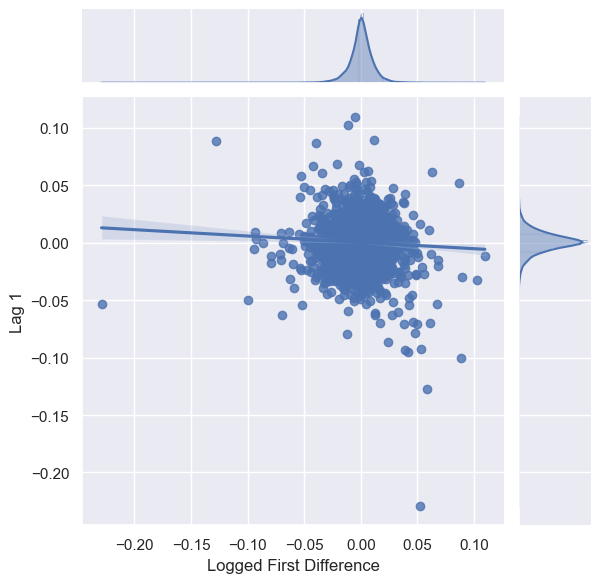

In [47]:
sns.jointplot(data=sp500, x='Logged First Difference', y='Lag 1', palette='Set2', kind = 'reg')
plt.show()

Notice how tightly packed the mass is around 0, besides it also appears to be pretty evenly distributed. We have shown again that the distribution of log-returns is not normal, which has already been proven above, but with a slightly different approach 

This seems to indicate that knowing the index value one day doesn't tell us much about what it will do the next day.

There's very little correlation between the change in value from one day to the next.

In [48]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

lag_correlations = acf(sp500['Logged First Difference'].iloc[1:])
lag_partial_correlations = pacf(sp500['Logged First Difference'].iloc[1:])

The auto-correlation function computes the correlation between a variable and itself at each lag step up to some limit (in this case 40). 

The partial auto-correlation function computes the correlation at each lag step that is NOT already explained by previous, lower-order lag steps. 

We can plot the results to see if there are any significant correlations.

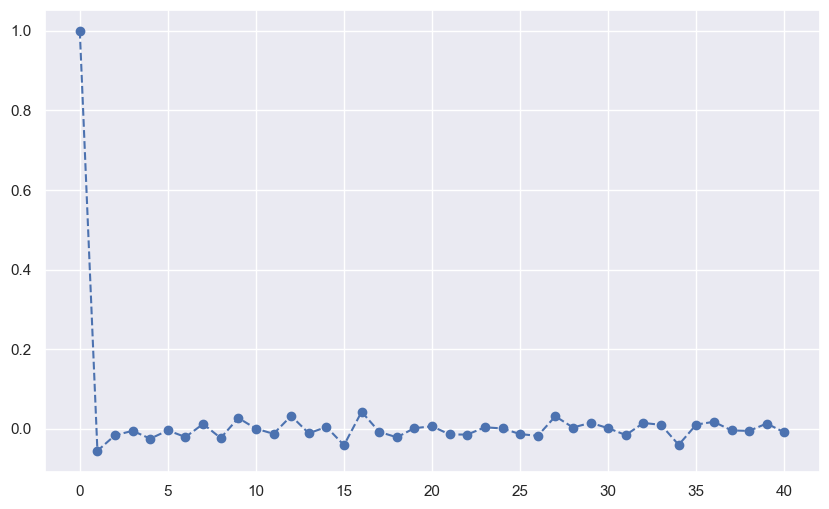

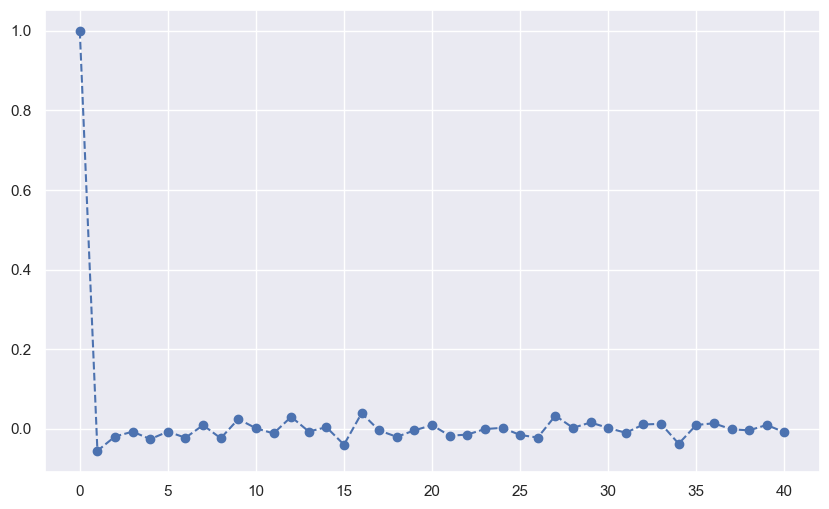

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(lag_correlations, marker='o', linestyle='--')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(lag_partial_correlations, marker='o', linestyle='--')

In [50]:
correlations_df = pd.DataFrame({
    'Lag': range(len(lag_correlations)),
    'ACF': lag_correlations,
    'PACF': lag_partial_correlations
})

# ACF plot
fig_acf = px.area(correlations_df, x='Lag', y='ACF', title='Autocorrelation Function (ACF)')
fig_acf.show()

# PACF plot
fig_pacf = px.area(correlations_df, x='Lag', y='PACF', title='Partial Autocorrelation Function (PACF)')
fig_pacf.show()


The autocorrelation and partial-autocorrelation results are very close to each other (the first upper plot is the autocorrelation results and the second lower plot is the partial-autocorrelation results). 

[//]: # "What this shows is that there is no significant (> 0.2) correlation between the value at time t and at any time prior to t up to 40 steps behind."

In order words, the log-returns series is just a sequence close to independent and identically distributed (i.i.d).

$\newline$
$\newline$

The block quantile method is used to analyze time series and allows you to take into account the relationship between values, dividing the series into blocks and considering the quantile values inside these blocks. 

For financial time series such as log-returns, this method can be useful for determining extreme values and analyzing the distribution of returns. 

This method helps to understand the distribution of returns, especially in the tails of the distribution, which is important for risk assessment.

$\newline$
#Extrapolation (application of the block quantiles method and its comparison with GPD+MLE)
$\newline$

In [54]:
#Here we import some necessary libraries. Please, run this cell.
import warnings
import scipy.stats as ss
import scipy.optimize as opt
import statsmodels.formula.api as smf
import statistics
import itertools
import math
import random
warnings.filterwarnings("ignore")

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from scipy.optimize import OptimizeResult
from sklearn.linear_model import QuantileRegressor
from tqdm import tqdm

In [55]:
#Here are all the functions that I use below

def quantile_LW_Pareto(n, k, glob):
  q = np.log(np.log(n/k))
  r = np.sqrt(glob**2 + 4*q)
  return np.exp(np.exp(((r - glob)/2)**2))

def quantile_W_LW(n, k, glob):
  return np.exp((np.log(np.log(n/k)))**2/glob)

def quantile_RV_W(n, k, glob):
  return np.exp(np.sqrt(np.log(n/k)/glob))

def test_statistic(n, k_n, samples, glob, method):

    const_log = np.log(n*1./k_n)

    if method == "LW_Pareto":
      #usually glob = 1.1 in this case
      const_quant = quantile_LW_Pareto(n, k_n, glob)
      const_quant2 = quantile_LW_Pareto(n, 2*k_n, glob)

      def locscale_LW_Pareto(x):
        t = (x - samples[n-k_n])/(samples[n-k_n] - samples[n-2*k_n])*(const_quant - const_quant2) + const_quant
        return np.exp(glob*np.sqrt(np.log(np.log(t))))*np.log(t) - const_log

      tmp = np.sum(locscale_LW_Pareto(np.array(samples[n-k_n:n])))

    elif method == "W_LW":
      #usually glob \in [3; 4] in this case
      const_quant = quantile_W_LW(n, k_n, glob)
      const_quant2 = quantile_W_LW(n, 2*k_n, glob)

      def locscale_W_LW(x):
        t = (x - samples[n-k_n])/(samples[n-k_n] - samples[n-2*k_n])*(const_quant - const_quant2) + const_quant
        return np.exp(np.sqrt(glob*abs(np.log(t)))) - const_log

      tmp = np.sum(locscale_W_LW(np.array(samples[n-k_n:n])))

    elif method == "RV_W":
      #usual value for glob is 0.4
      const_quant = quantile_RV_W(n, k_n, glob)
      const_quant2 = quantile_RV_W(n, 2*k_n, glob)

      def locscale_RV_W(x):
        t = (x - samples[n-k_n])/(samples[n-k_n] - samples[n-2*k_n])*(const_quant - const_quant2) + const_quant
        return glob*np.power(np.log(t),2) - const_log

      tmp = np.sum(locscale_RV_W(np.array(samples[n-k_n:n])))

    return 1/np.sqrt(k_n)*(tmp - k_n)

#Some necessary functions to apply block quantiles method and classical methods for tail estimation
def block_maxima(sample, number_of_blocks):

    n = len(sample)
    length = n // number_of_blocks
    #length = number_of_blocks
    sample_new = list(map(lambda x: np.max(sample[int(length*x):int(length*(x+1))]), range(number_of_blocks)))

    return sample_new
################################################################################
def generate_model(sample, alpha_min, alpha_max, block_min, block_max, number_block, ratio, threshold, is_threshold = True):

    if is_threshold:
      sample = sample[sample>threshold] - threshold
    n = len(sample)

    #block_size = list(map(lambda x: block_min + int(x*(block_max - block_min)/(number_block-1)), range(number_block)))
    block_size = list(map(lambda x: int(block_min*np.power((block_max - block_min), x/(number_block-1))), range(number_block-1)))
    #alphas = list(map(lambda x: alpha_min + x*(alpha_max - alpha_min)/(number_alpha-1), range(number_alpha)))

    feature = []
    target = []
    index = 0

    for i in block_size:
        n_temp = n // i
        alphas = []
        sample_temp = block_maxima(sample, n_temp)
        #sample_temp = block_maxima(sample, i)
        sample_temp = sorted(sample_temp)

        for j in range(n_temp):
          if (j >= alpha_min*n_temp)&(j <= alpha_max*n_temp):
            alphas.append(j)

        alphas = list(alphas)
        #feature_temp = list(map(lambda x: 1 - np.power(x, 1/n_temp), alphas))
        feature[index:index+len(alphas)] = list(map(lambda x: (1 - np.power(x/n_temp, 1/i)), alphas))
        #target[j*number_alpha:(j+1)*number_alpha] = list(map(lambda x: sample_temp[int(x*n_temp-1)], alphas))
        target[index:index+len(alphas)] = list(map(lambda x: sample_temp[x-1], alphas))
        #list(map(lambda x: sample_temp[int(x*n_temp-1)]*((x*n_temp) % 1) + sample_temp[int(x*n_temp)]*(1 - ((x*n_temp) % 1)), alphas))
        index = index+len(alphas)

    return feature, target
################################################################################
def quantile_of_maxima(evi, sigma, ratio, threshold, level, n):
    return threshold + np.exp(sigma)*np.power((1 - np.power(level, 1/n)), evi)
################################################################################
def quantile_classical(evi, sigma, theta, ratio, threshold, level, n):
    if evi != 0:
      return threshold + (np.power((1 - np.power(level, 1/(n*theta)))/ratio, -evi) - 1)*sigma/evi
    else:
      return threshold - np.log((1 - np.power(level, 1/(n*theta)))/ratio)*sigma
################################################################################
def quantile_trivial(evi, sigma, level, n):
    return np.exp(sigma + evi*np.log(1 - np.power(level, 1/n)))
################################################################################
def quantile_logweibull(theta, scale, location, level, n):
    return location + scale*np.exp(np.power(-np.log(1 - np.power(level, 1/n)), theta))
################################################################################
def quantile_logweibull_trivial(theta, sigma, level, n):
    return np.exp(sigma*np.power(-np.log(1 - np.power(level, 1/n)), theta))
################################################################################
def quantile_weibull(theta, scale, location, level, n):
    return location + scale*np.power(-np.log(1 - np.power(level, 1/n)), theta)
################################################################################
def quantile_weibull_trivial(theta, sigma, level, n):
    return sigma*np.power(-np.log(1 - np.power(level, 1/n)), theta)
################################################################################
def quantile_gev(evi, scale, location, theta, level, n):
    return location + scale*(-1 + np.power(-np.log(level)/n/theta, -evi))/evi
################################################################################
def hill_estimator(sample, ratio):
    sample = sorted(sample)
    n = len(sample)
    return np.mean(np.log(sample[int(n*(1-ratio)):])) - np.log(sample[int(n*(1-ratio))-1])
################################################################################
def moment(sample, ratio, power):
    sample = sorted(sample)
    n = len(sample)
    threshold = sample[int(n*(1-ratio))-1]
    return np.mean(np.power(np.log(sample[int(n*(1-ratio)):]) - np.log(threshold), power))
################################################################################
def moment_estimator(sample, ratio):
    hill = hill_estimator(sample, ratio)
    second_moment = moment(sample, ratio, 2)
    return hill + 1 - 0.5*second_moment/(second_moment - np.power(hill, 2))
################################################################################
def mle_estimator(sample, ratio):
    sample = sorted(sample)
    n = len(sample)
    threshold = sample[int(n*(1 - ratio))]
    return ss.genpareto.fit(np.array(sample[int(n*(1 - ratio))+1:]) - threshold, floc = 0)
################################################################################
def sigma_estimator(sample, ratio):

    sample = sorted(sample)
    n = len(sample)
    gamma = hill_estimator(sample, ratio)
    high_level = sample[int(n*(1-ratio))-1]

    ran = range(int(n*ratio))
    m_2n = 0
    for i in ran:
       m_2n += (np.log(sample[int(n-i-1)]) - np.log(high_level))**2/int(n*ratio)
    #m_2n = np.mean(list(map(lambda x: np.power(np.log(sample[int(x)]/high_level), 2), np.arange(int(n*(1-ratio)), n, 1))))
    gamma_minus = 1 - 0.5*m_2n/(m_2n - gamma**2)

    return high_level*gamma*(1-gamma_minus)
############################################################################3333
def adam(
    fun,
    x0,
    jac,
    args=(),
    learning_rate=0.005,
    beta1=0.9,
    beta2=0.999,
    eps=1e-8,
    startiter=0,
    maxiter=1000,
    callback=None,
    **kwargs
):
    """``scipy.optimize.minimize`` compatible implementation of ADAM -
    [http://arxiv.org/pdf/1412.6980.pdf].
    Adapted from ``autograd/misc/optimizers.py``.
    """
    x = x0
    m = np.zeros_like(x)
    v = np.zeros_like(x)

    for i in range(startiter, startiter + maxiter):
        g = jac(x)

        if callback and callback(x):
            break

        m = (1 - beta1) * g + beta1 * m  # first  moment estimate.
        v = (1 - beta2) * (g**2) + beta2 * v  # second moment estimate.
        mhat = m / (1 - beta1**(i + 1))  # bias correction.
        vhat = v / (1 - beta2**(i + 1))
        x = x - learning_rate * mhat / (np.sqrt(vhat) + eps)

    i += 1
    return OptimizeResult(x=x, fun=fun(x), jac=g, nit=i, nfev=i, success=True)
################################################################################

def CvM(x,y):
  res = ss.cramervonmises_2samp(x, y)
  return res.statistic#, res.pvalue
################################################################################
def LS(feature, target, method, N, alphas):

    target = np.array(target)
    feature = np.array(feature)
    mintarget = target.min() - math.e - 1
    target -= mintarget
    d1 = {'target': target, 'feature': feature}
    data2 = pd.DataFrame(d1)

    if method == 'W':
        m = smf.ols('np.log(target) ~ np.log(-np.log(feature))', data=data2)
        mfit = m.fit()
        quantiles = np.array(list(map(lambda x: quantile_weibull_trivial(mfit.params[1], np.exp(mfit.params[0]), x, N), alphas)))+mintarget
    elif method == 'LW':
        m = smf.ols('np.log(np.log(target)) ~ np.log(-np.log(feature))', data=data2)
        mfit = m.fit()
        quantiles = np.array(list(map(lambda x: quantile_logweibull_trivial(mfit.params[1], np.exp(mfit.params[0]), x, N), alphas))) + mintarget
    elif method == 'RV':
        m = smf.ols('np.log(target) ~ np.log(feature)', data=data2)
        mfit = m.fit()
        quantiles = np.array(list(map(lambda x: quantile_trivial(mfit.params[1], mfit.params[0], x, N), alphas))) + mintarget

    #return quantiles, mfit.params[1]
    return quantiles, mfit.params[0], mfit.params[1]
################################################################################
def Theil(feature, target, method, N, alphas):

    target = np.array(target)
    feature = np.array(feature)
    mintarget = target.min() - math.e - 1.0
    target -= mintarget

    if method == 'W':
        x = np.log(-np.log(feature))
        y = np.log(target)
    elif method == 'LW':
        x = np.log(-np.log(feature))
        y = np.log(np.log(target))
    elif method == 'RV':
        x = np.log(feature)
        y = np.log(target)

    #diff = []
    #for k in range(len(x)):
    #  for j in range(k+1, len(x)):
    #    diff.append((y[k] - y[j])/(x[k] - x[j]))

    evi_theil, sigma_theil, a, b = ss.theilslopes(y, x, alpha=0.95, method='joint')

    #evi_theil = statistics.median(diff)
    #sigma_theil = statistics.median(y - evi_theil*x)

    if method == 'W':
        quantiles = np.array(list(map(lambda x: quantile_weibull_trivial(evi_theil, np.exp(sigma_theil), x, N), alphas))) + mintarget
    elif method == 'LW':
        quantiles = np.array(list(map(lambda x: quantile_logweibull_trivial(evi_theil, np.exp(sigma_theil), x, N), alphas))) + mintarget
    elif method == 'RV':
        quantiles = np.array(list(map(lambda x: quantile_trivial(evi_theil, sigma_theil, x, N), alphas))) + mintarget

    #return quantiles, evi_theil
    return quantiles, sigma_theil, evi_theil
################################################################################
def Adam(feature, target, method, N, alphas, starting_theta, rho):

    target = np.array(target)
    #target_std = 1
    #target_mean = 0
    #For tail estimation it is important!
    target_mean = target.mean()
    target_std = target.std()
    target = (target - target_mean)/target_std
    target_min = target.min()-1.

    if method == 'W':
      def func(x):
        return np.sum(np.power(np.abs(target - x[2] - x[1]*np.power(-np.log(feature), x[0])), rho))/rho

      def gradient(x):
        d = np.zeros(3)
        d[0] = - np.sum(np.sign(target - x[2] - x[1]*np.power(-np.log(feature), x[0]))*x[1]*np.power(-np.log(feature), x[0])*np.log(-np.log(feature))*np.power(np.abs(target - x[2] - x[1]*np.power(-np.log(feature), x[0])), rho-1))
        d[1] = - np.sum(np.sign(target - x[2] - x[1]*np.power(-np.log(feature), x[0]))*np.power(-np.log(feature), x[0])*np.power(np.abs(target - x[2] - x[1]*np.power(-np.log(feature), x[0])), rho-1))
        d[2] = - np.sum(np.sign(target - x[2] - x[1]*np.power(-np.log(feature), x[0]))*np.power(np.abs(target - x[2] - x[1]*np.power(-np.log(feature), x[0])), rho-1))
        return d

    elif method == 'LW':
      def func(x):
        return np.sum(np.power(np.abs(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0]))), rho))/rho

      def gradient(x):
        d = np.zeros(3)
        d[0] = - np.sum(np.sign(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0])))*x[1]*np.exp(np.power(-np.log(feature), x[0]))*np.power(np.abs(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0]))), rho-1)*np.exp(np.power(-np.log(feature), x[0]))*np.power(-np.log(feature), x[0])*np.log(-np.log(feature)))
        d[1] = - np.sum(np.sign(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0])))*np.exp(np.power(-np.log(feature), x[0]))*np.power(np.abs(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0]))), rho-1))
        d[2] = - np.sum(np.sign(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0])))*np.power(np.abs(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0]))), rho-1))
        return d

    elif method == 'RV':
      def func(x):
        return np.sum(np.power(np.abs(target - x[2] - x[1]*np.power(feature, - x[0])), rho))/rho

      def gradient(x):
        d = np.zeros(3)
        d[0] = np.sum(np.sign(target - x[2] - x[1]*np.power(feature, - x[0]))*x[1]*np.power(feature, - x[0])*np.log(feature)*np.power(np.abs(target - x[2] - x[1]*np.power(feature, - x[0])), rho-1))
        d[1] = - np.sum(np.sign(target - x[2] - x[1]*np.power(feature, - x[0]))*np.power(feature, - x[0])*np.power(np.abs(target - x[2] - x[1]*np.power(feature, - x[0])), rho-1))
        d[2] = - np.sum(np.sign(target - x[2] - x[1]*np.power(feature, - x[0]))*np.power(np.abs(target - x[2] - x[1]*np.power(feature, - x[0])), rho-1))
        return d

    #z = np.array([starting_theta, 1., 0])
    z = np.array([starting_theta, 1., -1])
    #z = np.array([1., 1., -1.])
    res = opt.minimize(func, z, jac = gradient, method=adam)
    resx = np.zeros(3)
    resx[0] = res.x[0]
    resx[1] = res.x[1]*target_std
    resx[2] = res.x[2]*target_std + target_mean

    if method == 'W':
        quantiles = list(map(lambda y: quantile_weibull(res.x[0], res.x[1]*target_std, res.x[2]*target_std + target_mean, y, N), alphas))
    elif method == 'LW':
        quantiles = list(map(lambda y: quantile_logweibull(res.x[0], res.x[1]*target_std, res.x[2]*target_std + target_mean, y, N), alphas))
    elif method == 'RV':
        quantiles = list(map(lambda x: quantile_of_maxima(-res.x[0], np.log(res.x[1]*target_std), 1, res.x[2]*target_std + target_mean, x, N), alphas))
    return quantiles, resx
################################################################################
def QuantLS(feature, target, method, level, N, alphas):

    target = np.array(target)
    feature = np.array(feature)
    mintarget = target.min() - math.e - 1
    target -= mintarget
    d1 = {'target': target, 'feature': feature}
    data2 = pd.DataFrame(d1)

    if method == 'W':
        m = smf.quantreg('np.log(target) ~ np.log(-np.log(feature))', data=data2)
        mfit = m.fit(q = level)
        quantiles = np.array(list(map(lambda x: quantile_weibull_trivial(mfit.params[1], np.exp(mfit.params[0]), x, N), alphas)))+mintarget
    elif method == 'LW':
        m = smf.quantreg('np.log(np.log(target)) ~ np.log(-np.log(feature))', data=data2)
        mfit = m.fit(q = level)
        quantiles = np.array(list(map(lambda x: quantile_logweibull_trivial(mfit.params[1], np.exp(mfit.params[0]), x, N), alphas))) + mintarget
    elif method == 'RV':
        m = smf.quantreg('np.log(target) ~ np.log(feature)', data=data2)
        mfit = m.fit(q = level)
        quantiles = np.array(list(map(lambda x: quantile_trivial(mfit.params[1], mfit.params[0], x, N), alphas))) + mintarget

    return quantiles
################################################################################
def QuantTheil(feature, target, method, level, N, alphas):

    target = np.array(target)
    feature = np.array(feature)
    mintarget = target.min() - math.e - 1.0
    target -= mintarget

    if method == 'W':
        x = np.log(-np.log(feature))
        y = np.log(target)
    elif method == 'LW':
        x = np.log(-np.log(feature))
        y = np.log(np.log(target))
    elif method == 'RV':
        x = np.log(feature)
        y = np.log(target)

    if level<0.5:
      level1 = 2*np.sqrt(1 - level) - 1
    else:
      level1 = 2*np.sqrt(level) - 1

    #diff = []
    #for k in range(len(x)):
    #  for j in range(k+1, len(x)):
    #    diff.append((y[k] - y[j])/(x[k] - x[j]))

    evi_theil, sigma_theil, a, b = ss.theilslopes(y, x, alpha=level1, method='joint')

    #evi_theil = statistics.median(diff)
    if level <0.5:
      sigma_theil = np.quantile(y - evi_theil*x, 1 - np.sqrt(1 - level))
      evi_theil = a
    else:
      sigma_theil = np.quantile(y - evi_theil*x, np.sqrt(level))
      evi_theil = b

    if method == 'W':
        quantiles = np.array(list(map(lambda x: quantile_weibull_trivial(evi_theil, np.exp(sigma_theil), x, N), alphas))) + mintarget
    elif method == 'LW':
        quantiles = np.array(list(map(lambda x: quantile_logweibull_trivial(evi_theil, np.exp(sigma_theil), x, N), alphas))) + mintarget
    elif method == 'RV':
        quantiles = np.array(list(map(lambda x: quantile_trivial(evi_theil, sigma_theil, x, N), alphas))) + mintarget

    #return quantiles, evi_theil
    return quantiles
################################################################################
def neg(x):
    return np.sign(x)*(np.sign(x)-1)/2.
################################################################################
def QuantAdam(feature, target, method, level, N, alphas, starting_theta, rho):

    target = np.array(target)
    target_mean = target.mean()
    target_std = target.std()
    target = (target - target_mean)/target_std
    target_min = target.min()-1.

    if method == 'W':
      def func(x):
        return np.sum(np.power(np.abs(target - x[2] - x[1]*np.power(-np.log(feature), x[0])), rho) * (level + (1 - 2*level)*neg(target - x[2] - x[1]*np.power(-np.log(feature), x[0]))))/rho

      def gradient(x):
        d = np.zeros(3)
        d[0] = - np.sum(np.sign(target - x[2] - x[1]*np.power(-np.log(feature), x[0]))*x[1]*np.power(-np.log(feature), x[0])*np.log(-np.log(feature))*np.power(np.abs(target - x[2] - x[1]*np.power(-np.log(feature), x[0])), rho-1) * (level + (1 - 2*level)*neg(target - x[2] - x[1]*np.power(-np.log(feature), x[0]))))
        d[1] = - np.sum(np.sign(target - x[2] - x[1]*np.power(-np.log(feature), x[0]))*np.power(-np.log(feature), x[0])*np.power(np.abs(target - x[2] - x[1]*np.power(-np.log(feature), x[0])), rho-1) * (level + (1 - 2*level)*neg(target - x[2] - x[1]*np.power(-np.log(feature), x[0]))))
        d[2] = - np.sum(np.sign(target - x[2] - x[1]*np.power(-np.log(feature), x[0]))*np.power(np.abs(target - x[2] - x[1]*np.power(-np.log(feature), x[0])), rho-1) * (level + (1 - 2*level)*neg(target - x[2] - x[1]*np.power(-np.log(feature), x[0]))))
        return d

    elif method == 'LW':
      def func(x):
        return np.sum(np.power(np.abs(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0]))), rho)* (level + (1 - 2*level)*neg(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0])))))/rho

      def gradient(x):
        d = np.zeros(3)
        d[0] = - np.sum(np.sign(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0])))*x[1]*np.exp(np.power(-np.log(feature), x[0]))*np.power(np.abs(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0]))), rho-1)*np.exp(np.power(-np.log(feature), x[0]))*np.power(-np.log(feature), x[0])*np.log(-np.log(feature)) * (level + (1 - 2*level)*neg(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0])))))
        d[1] = - np.sum(np.sign(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0])))*np.exp(np.power(-np.log(feature), x[0]))*np.power(np.abs(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0]))), rho-1)*(level + (1 - 2*level)*neg(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0])))))
        d[2] = - np.sum(np.sign(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0])))*np.power(np.abs(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0]))), rho-1)*(level + (1 - 2*level)*neg(target - x[2] - x[1]*np.exp(np.power(-np.log(feature), x[0])))))
        return d

    elif method == 'RV':
      def func(x):
        return np.sum(np.power(np.abs(target - x[2] - x[1]*np.power(feature, - x[0])), rho)*(level + (1 - 2*level)*neg(target - x[2] - x[1]*np.power(feature, -x[0]))))/rho

      def gradient(x):
        d = np.zeros(3)
        d[0] = np.sum(np.sign(target - x[2] - x[1]*np.power(feature, - x[0]))*x[1]*np.power(feature, - x[0])*np.log(feature)*np.power(np.abs(target - x[2] - x[1]*np.power(feature, - x[0])), rho-1)*(level + (1 - 2*level)*neg(target - x[2] - x[1]*np.power(feature, -x[0]))))
        d[1] = - np.sum(np.sign(target - x[2] - x[1]*np.power(feature, - x[0]))*np.power(feature, - x[0])*np.power(np.abs(target - x[2] - x[1]*np.power(feature, - x[0])), rho-1)*(level + (1 - 2*level)*neg(target - x[2] - x[1]*np.power(feature, -x[0]))))
        d[2] = - np.sum(np.sign(target - x[2] - x[1]*np.power(feature, - x[0]))*np.power(np.abs(target - x[2] - x[1]*np.power(feature, - x[0])), rho-1)*(level + (1 - 2*level)*neg(target - x[2] - x[1]*np.power(feature, -x[0]))))
        return d

    z = np.array([starting_theta, 1., -1.])
    #z = np.array([1., 1., -1.])
    res = opt.minimize(func, z, jac = gradient, method=adam)

    if method == 'W':
        quantiles = list(map(lambda y: quantile_weibull(res.x[0], res.x[1]*target_std, res.x[2]*target_std + target_mean, y, N), alphas))
    elif method == 'LW':
        quantiles = list(map(lambda y: quantile_logweibull(res.x[0], res.x[1]*target_std, res.x[2]*target_std + target_mean, y, N), alphas))
    elif method == 'RV':
        quantiles = list(map(lambda x: quantile_of_maxima(-res.x[0], np.log(res.x[1]*target_std), 1, res.x[2]*target_std + target_mean, x, N), alphas))
    return quantiles
################################################################################
def mle_bounds_bootstrap(sample, ratio, confidence):
    gamma = mle_estimator(sample, ratio)[0]
    sample = sorted(sample)
    a = int(200*(confidence+1))-1
    b = int(200*(1-confidence))-1
    n = len(sample)
    threshold = sample[int(n*(1 - ratio))]
    sample_boot = np.array(sample[int(n*(1 - ratio))+1:]) - threshold
    n_boot = len(sample_boot)
    mle_boot = np.array(list(map(lambda x: ss.genpareto.fit(np.random.choice(sample_boot, size = n_boot), floc = 0)[0], range(400))))
    mle_boot = sorted(mle_boot)
    return mle_boot[a] - gamma, mle_boot[b] - gamma
################################################################################
def q_gamma(g, ratio, level):
    t = ratio/(1-level)
    return (g*np.power(t, g)*np.log(t) - np.power(t, g) + 1)/np.power(g, 2)
################################################################################


In [56]:
#Some preparations

sample = sp500['Logged First Difference']
length = len(sample)
sample_train = sample[:int(length/11)]
sample_test = sample[int(length/11):]
length_test = len(sample_test)
confidence = 0.95 #for CI
new_alphas = list(map(lambda x: 0.98+x*0.0001, range(190)))
new_alphas_train = list(map(lambda x: 0.90+x*0.001, range(100)))
sorted_sample_train = sorted(sample_train)
sorted_sample_test = sorted(sample_test)
empirical_quantiles = list(map(lambda x: sorted_sample_test[int(length_test*x)-1], new_alphas))

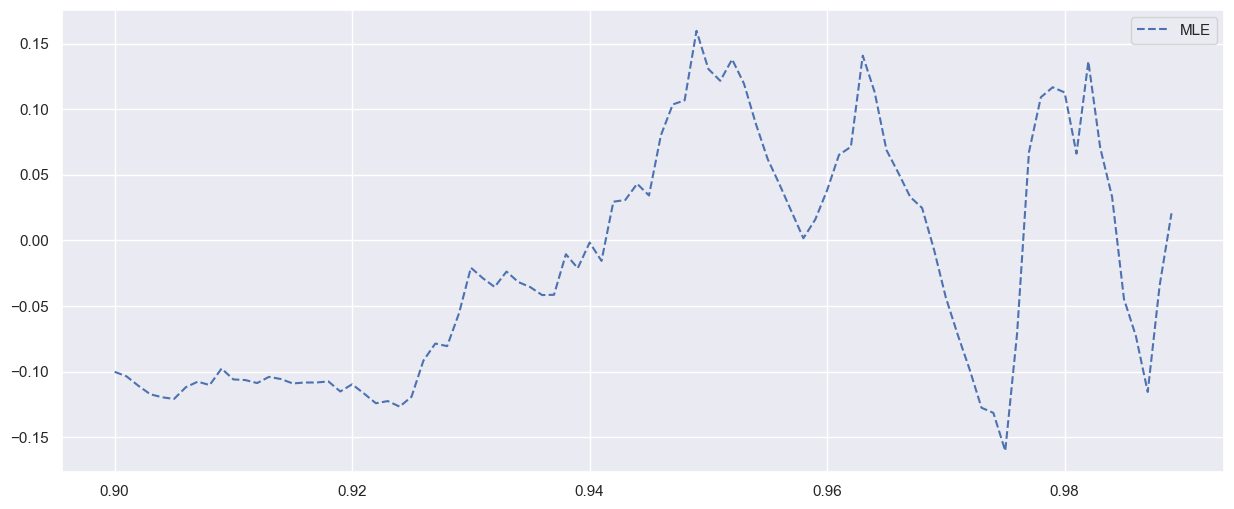

In [57]:
#Here we find the interval of stability of the EVI estimator to select the threshold

est_mle = list(map(lambda x: mle_estimator(sample_train, 1-x)[0], new_alphas_train[:90]))
plt.plot(new_alphas_train[:90], est_mle, 'b--', label = 'MLE')
plt.legend()

In [58]:
len(sample_train)

988

In [59]:
ratio_of_high_values = 0.07
length_train = len(sample_train)
N_for_check = 1
evi = hill_estimator(sample_train, ratio_of_high_values)
evi_moment = moment_estimator(sample_train, ratio_of_high_values)
sigma = sigma_estimator(sample_train, ratio_of_high_values)
theta = 1 #intervals_estimator(sample, ratio_of_high_values)
evi_pmle, loc_pmle, sigma_pmle = mle_estimator(sample_train, ratio_of_high_values)
threshold = sorted_sample_train[int(length_train*(1 - ratio_of_high_values))]
estimated_quantiles_classical = list(map(lambda x: quantile_classical(evi, sigma, theta, ratio_of_high_values, threshold, x, N_for_check), new_alphas))
moment_quantiles = list(map(lambda x: quantile_classical(evi_moment, sigma, theta, ratio_of_high_values, threshold, x, N_for_check), new_alphas))
estimated_genpareto = list(map(lambda x: quantile_classical(evi_pmle, sigma_pmle, theta, ratio_of_high_values, threshold, x, N_for_check), new_alphas))

In [60]:
mle_boot_bounds = mle_bounds_bootstrap(sample_train, ratio_of_high_values, confidence)
bup = sigma_pmle*mle_boot_bounds[0]
bdown = sigma_pmle*mle_boot_bounds[1]
boot_bound_up = list(map(lambda x: bup*q_gamma(evi_pmle, ratio_of_high_values, x), new_alphas))
boot_bound_down = list(map(lambda x: bdown*q_gamma(evi_pmle, ratio_of_high_values, x), new_alphas))

In [61]:
#Setting hyperparameters for the block quantiles method
block_min = int(np.power(length_train, 1/4))
block_max = int(np.power(length_train, 3/4))
number_block = int(2*np.sqrt(block_max - block_min))

alpha_min = 0.01
alpha_max = 0.99
rho = 2

In [62]:
#Block quantiles method for Weibull model
feature1, target1 = generate_model(sample_train, alpha_min, alpha_max, block_min, block_max, number_block, ratio_of_high_values, threshold, is_threshold = False)

estimated_quantiles2, sig1, starting_theta = LS(feature1, target1, 'W', N_for_check, new_alphas)
quantiles_theil1, sig2, starting_theta2 = Theil(feature1, target1, 'W', N_for_check, new_alphas)
#quantiles_cobyla, res_cob = Cobyla(feature1, target1, 'W', N_for_check, new_alphas, starting_theta)
quantiles_adam, res_adam = Adam(feature1, target1, 'W', N_for_check, new_alphas, starting_theta, rho)
#starting_theta, starting_theta2, res_cob, res_adam

In [63]:
#Quantile regression
quantiles_ls_down = QuantLS(feature1, target1, 'W', 0.025, N_for_check, new_alphas)
quantiles_ls_up = QuantLS(feature1, target1, 'W', 0.975, N_for_check, new_alphas)
quantiles_adam_up = QuantAdam(feature1, target1, 'W', 0.975, N_for_check, new_alphas, starting_theta, rho)
quantiles_adam_down = QuantAdam(feature1, target1, 'W', 0.025, N_for_check, new_alphas, starting_theta, rho)
quantiles_theil_up = QuantTheil(feature1, target1, 'W', 0.975, N_for_check, new_alphas)
quantiles_theil_down = QuantTheil(feature1, target1, 'W', 0.025, N_for_check, new_alphas)

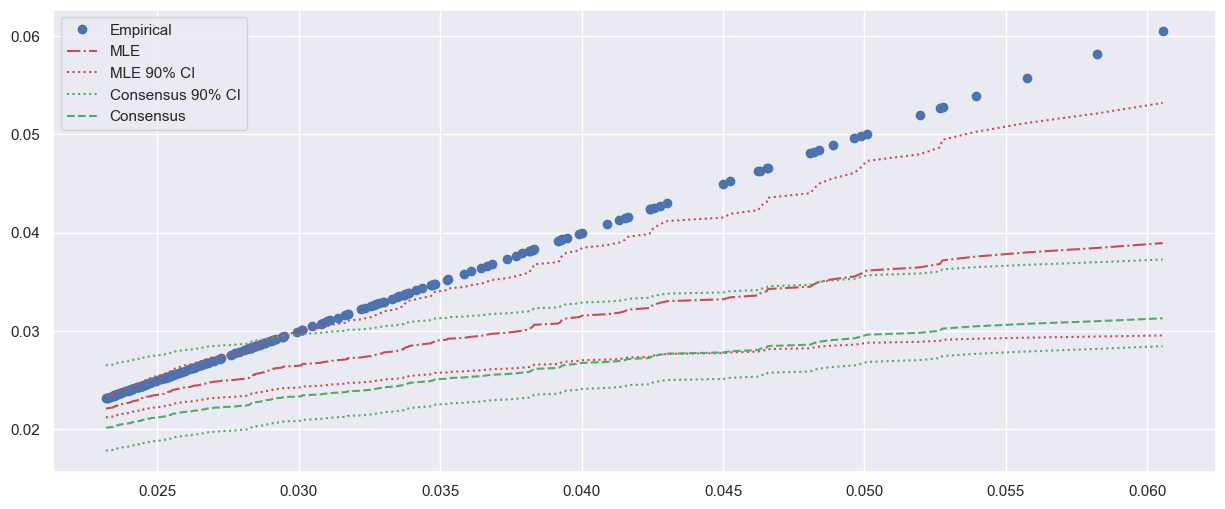

In [64]:
consensus = (quantiles_adam + quantiles_theil1 + estimated_quantiles2)/3.
#consensus1 = (quantiles_cobyla + quantiles_theil1 + estimated_quantiles2)/3.
#consensus2 = (quantiles_cobyla + quantiles_theil1 + estimated_quantiles2 + quantiles_adam)/4.
consensus_down = (quantiles_adam + quantiles_theil_down + quantiles_ls_down)/3.
consensus_up = (quantiles_adam_up + quantiles_theil_up + quantiles_ls_up)/3.
plt.plot(empirical_quantiles, empirical_quantiles, 'bo', label = "Empirical")
#plt.plot(np.array(empirical_quantiles), np.array(estimated_genpareto) - np.array(empirical_quantiles), 'r-.', label = "MLE")
plt.plot(np.array(empirical_quantiles), np.array(estimated_genpareto), 'r-.', label = "MLE")
plt.plot(empirical_quantiles, np.array(estimated_genpareto) - np.array(boot_bound_up), 'r:', label = "MLE 90% CI")
plt.plot(empirical_quantiles, np.array(estimated_genpareto) - np.array(boot_bound_down), 'r:')
#plt.plot(empirical_quantiles, estimated_quantiles_classical, 'g-.')
#plt.plot(empirical_quantiles, moment_quantiles, 'y:')
#plt.plot(empirical_quantiles, quantiles_adam, 'm--', label = "Adam")
#plt.plot(empirical_quantiles, quantiles_adam_up, 'g:', label = "Adam 90% CI")
#plt.plot(empirical_quantiles, quantiles_adam_down, 'g:')
#plt.plot(empirical_quantiles, quantiles_cobyla, 'k--', label = "Cobyla")
#plt.plot(empirical_quantiles, estimated_quantiles2, 'y--', label = "LS")
plt.plot(empirical_quantiles, consensus_up, 'g:', label = "Consensus 90% CI")
plt.plot(empirical_quantiles, consensus_down, 'g:')
#plt.plot(empirical_quantiles, quantiles_theil1, 'g--', label = "Theil")
plt.plot(empirical_quantiles, consensus, 'g--', label = "Consensus")
#plt.plot(empirical_quantiles, consensus1, ':', label = "Consensus_Cob")
plt.legend()

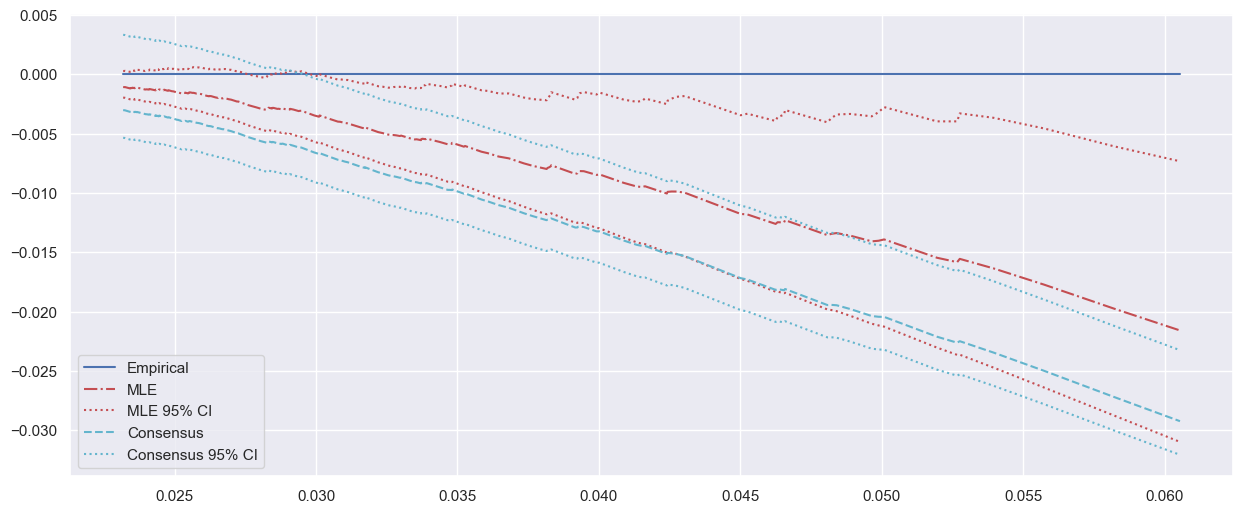

In [65]:
consensus = (quantiles_adam + quantiles_theil1 + estimated_quantiles2)/3.
consensus_down = (quantiles_adam + quantiles_theil_down + quantiles_ls_down)/3.
consensus_up = (quantiles_adam_up + quantiles_theil_up + quantiles_ls_up)/3.
plt.plot(empirical_quantiles, np.zeros(len(empirical_quantiles)), 'b-', label = "Empirical")
plt.plot(np.array(empirical_quantiles), np.array(estimated_genpareto) - np.array(empirical_quantiles), 'r-.', label = "MLE")
plt.plot(np.array(empirical_quantiles), np.array(estimated_genpareto) - np.array(boot_bound_up) - np.array(empirical_quantiles), 'r:', label = "MLE 95% CI")
plt.plot(np.array(empirical_quantiles), np.array(estimated_genpareto) - np.array(boot_bound_down) - np.array(empirical_quantiles), 'r:')#, label = "MLE_boot bound")
#plt.plot(np.array(empirical_quantiles), np.array(estimated_genpareto), 'r-.', label = "MLE")
#plt.plot(empirical_quantiles, estimated_quantiles_classical, 'g-.')
#plt.plot(empirical_quantiles, moment_quantiles, 'y:')
#plt.plot(np.array(empirical_quantiles), np.array(quantiles_adam) - np.array(empirical_quantiles), 'g-.', label = "Adam")
#plt.plot(np.array(empirical_quantiles), np.array(quantiles_adam_up) - np.array(empirical_quantiles), 'g:', label = "Adam 90% CI")
#plt.plot(np.array(empirical_quantiles), np.array(quantiles_adam_down) - np.array(empirical_quantiles), 'g:')
#plt.plot(np.array(empirical_quantiles), np.array(quantiles_cobyla) - np.array(empirical_quantiles), 'k:', label = "Cobyla")
#plt.plot(np.array(empirical_quantiles), np.array(estimated_quantiles2) - np.array(empirical_quantiles), 'y-.', label = "LS")
#plt.plot(np.array(empirical_quantiles), np.array(quantiles_down) - np.array(empirical_quantiles), 'y:', label = "LS 90% CI")
#plt.plot(np.array(empirical_quantiles), np.array(quantiles_up) - np.array(empirical_quantiles), 'y:')
#plt.plot(empirical_quantiles, quantiles_MLE_Weibull, 'y:', label = "LS")
#plt.plot(np.array(empirical_quantiles), np.array(quantiles_theil1) - np.array(empirical_quantiles), 'g:', label = "Theil")
plt.plot(np.array(empirical_quantiles), np.array(consensus) - np.array(empirical_quantiles), 'c--', label = "Consensus")
plt.plot(np.array(empirical_quantiles), np.array(consensus_up) - np.array(empirical_quantiles), 'c:', label = "Consensus 95% CI")
plt.plot(np.array(empirical_quantiles), np.array(consensus_down) - np.array(empirical_quantiles), 'c:') #label = "Consensus_Cob+Ad")
plt.legend()

In [66]:
CvM(empirical_quantiles, consensus), CvM(empirical_quantiles, estimated_genpareto)

(15.141634349030468, 3.4534349030470963)

In [67]:
start_date = '2020-04-01'
end_date = '2022-03-31'

data = yf.Ticker('GOOGL').history(start = start_date, end = end_date, actions =  False)

data

Open        High         Low       Close   
Date                                                                        
2020-04-01 00:00:00-04:00   56.135574   56.406263   54.611822   55.041828  \
2020-04-02 00:00:00-04:00   54.936950   56.074145   54.593846   55.787476   
2020-04-03 00:00:00-04:00   55.671605   55.875370   53.692378   54.572365   
2020-04-06 00:00:00-04:00   56.585061   59.469247   56.185518   59.091682   
2020-04-07 00:00:00-04:00   60.780740   60.969027   58.795020   59.060215   
...                               ...         ...         ...         ...   
2022-03-24 00:00:00-04:00  139.040424  141.456657  137.592592  141.409714   
2022-03-25 00:00:00-04:00  141.753307  141.872174  139.577307  141.510590   
2022-03-28 00:00:00-04:00  140.738979  141.839720  139.651222  141.293350   
2022-03-29 00:00:00-04:00  142.483983  143.628666  141.875673  142.342133   
2022-03-30 00:00:00-04:00  142.296689  142.556889  141.437674  141.775787   

                             Volume  
Date                                 
2020-04-01 00:00:00-04:00  51970000  
2020-04-02 00:00:00-04:00  56410000  
2020-04-03 00:00:00-04:00  51374000  
2020-04-06 00:00:00-04:00  63320000  
2020-04-07 00:00:00-04:00  61620000  
...                             ...  
2022-03-24 00:00:00-04:00  26396000  
2022-03-25 00:00:00-04:00  24126000  
2022-03-28 00:00:00-04:00  35050000  
2022-03-29 00:00:00-04:00  34318000  
2022-03-30 00:00:00-04:00  19884000  

[504 rows x 5 columns]

In [68]:
sp500_spy = yf.download('SPY', start='2023-02-01', end=dt.datetime.now())
sp500_spy.head()

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close   
Date                                                                     
2023-02-01  405.209991  413.670013  402.350006  410.799988  403.396484  \
2023-02-02  414.859985  418.309998  412.880005  416.779999  409.268707   
2023-02-03  411.589996  416.970001  411.089996  412.350006  404.918579   
2023-02-06  409.790009  411.290009  408.100006  409.829987  402.444000   
2023-02-07  408.869995  416.489990  407.570007  415.190002  407.707397   

               Volume  
Date                   
2023-02-01  101459200  
2023-02-02  101654500  
2023-02-03   94736800  
2023-02-06   60295300  
2023-02-07   90990700

Bibliography

[1] Statistical Analysis of the Log Returns of Financial Assets Leo Quigley, Dr. Volkert Paulsen, Dr. David Ramsey, April 9, 2008

[2] https://github.com/bhattbhavesh91/adf-test-stationarity-python/blob/master/augmented-dickey-fuller-test-python.ipynb - link about ACF test

[3] Option pricing under stochastic volatility A numerical investigation of the Heston model Rickard Kjellin Gustav L¨ovgren January 25, 2006 - https://www.researchgate.net/figure/Histogram-of-daily-SP500-log-returns_fig1_45197528

[4] 





$\newline$